## Chapter 4: Testing and regularization with Turi Create

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

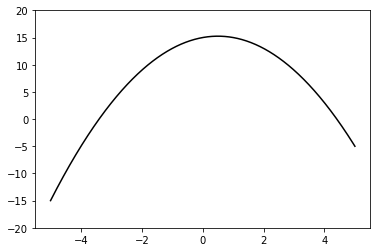

In [53]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n=len(coefs)
    x = np.linspace(-5,5,1000)
    plt.ylim(-20,20)
    plt.plot(x,sum([coefs[i]*x**i  for i in range(n)]), linestyle="-", color="black")

draw_polynomial(coefs)

In [57]:
X=[]
Y=[]
for i in range(40):
    x=random.uniform(-5,5)
    y=polynomial(coefs,x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)

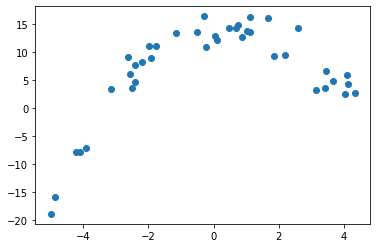

In [5]:
plt.scatter(X,Y)

## Training a polynomial regression model

In [6]:
import turicreate as tc

In [7]:
data = tc.SFrame({'x': X, 'y':Y})
data

x,y
3.4442185152504816,6.685961311021467
-2.4108324970703663,4.690236225597948
0.11274721368608542,12.205789026637378
-1.9668727392107255,11.133217991032268
-0.23403045847644144,10.927272159051856
0.046868558173902564,12.8584762866286
-2.1816215560029617,8.16012255928749
-2.4949365863755943,3.5061587527226514
4.097462559682402,5.933186396721837
4.021659504395828,2.454299054753137


In [8]:
for i in range(2,200):
    string="x^"+str(i)
    data[string]=data["x"].apply(lambda x:x**i)

## Splitting data into training and testing

In [9]:
train, test = data.random_split(.8, seed=0)

In [10]:
def display_results(model):
    coefs = model.coefficients
    print("Training error (rmse):", model.evaluate(train)['rmse'])
    print("Testing error (rmse):", model.evaluate(test)['rmse'])
    plt.scatter(train['x'], train['y'], marker="o")
    plt.scatter(test["x"], test["y"], marker='^')
    draw_polynomial(coefs['value'])
    plt.show()
    print("Polynomial coefficients")
    print(coefs["name", "value"])

## Training a polynomial regression model with no regularization

In [11]:
model_no_reg = tc.linear_regression.create(
    train, target="y", l1_penalty=0.0, l2_penalty=0.0, verbose=False, validation_set=None)
model_L1_reg = tc.linear_regression.create(
    train, target="y", l1_penalty=0.1, l2_penalty=0.0, verbose=False, validation_set=None)
model_L2_reg = tc.linear_regression.create(
    train, target="y", l1_penalty=0.0, l2_penalty=0.1, verbose=False, validation_set=None)

Training error (rmse): 1.5213829303807986
Testing error (rmse): 699.0325176744669


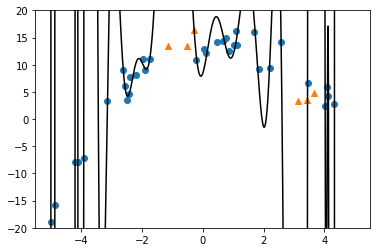

Polynomial coefficients
+-------------+---------------------+
|     name    |        value        |
+-------------+---------------------+
| (intercept) |  8.409132643442717  |
|      x      |  15.877898056607998 |
|     x^2     |  108.8735358163443  |
|     x^3     | -212.88678661687192 |
|     x^4     |  -97.13225053973962 |
|     x^5     |  258.47096686275455 |
|     x^6     |  38.335889248828835 |
|     x^7     | -128.78387647931117 |
|     x^8     |  -9.214500432847792 |
|     x^9     |  32.840417055946915 |
+-------------+---------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [12]:
display_results(model_no_reg)

Training error (rmse): 9.473874911154354
Testing error (rmse): 10.077027617091746


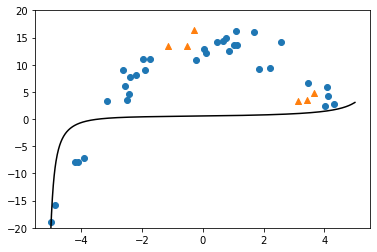

Polynomial coefficients
+-------------+-------------------------+
|     name    |          value          |
+-------------+-------------------------+
| (intercept) |    0.5655798426406278   |
|      x      |    0.0694081636504658   |
|     x^2     |  0.0075528368273853445  |
|     x^3     |   0.003947237269580271  |
|     x^4     | -0.00021279451431743294 |
|     x^5     |  0.00019048017792383447 |
|     x^6     |  -1.798514046251732e-05 |
|     x^7     |   7.88081493506395e-06  |
|     x^8     |  -8.895545466589715e-07 |
|     x^9     |  3.020651102542037e-07  |
+-------------+-------------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [13]:
display_results(model_L1_reg)

Training error (rmse): 1.714673638689723
Testing error (rmse): 3.413615797210576


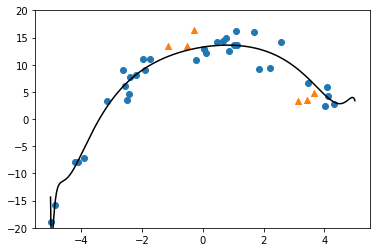

Polynomial coefficients
+-------------+-------------------------+
|     name    |          value          |
+-------------+-------------------------+
| (intercept) |    13.242877632262703   |
|      x      |    0.8742327276128922   |
|     x^2     |    -0.519442544052024   |
|     x^3     |   0.006007308646500496  |
|     x^4     |  -0.021611699669646676  |
|     x^5     |  0.0011472313840807627  |
|     x^6     | -0.00039568239266103136 |
|     x^7     |  3.537559873068439e-05  |
|     x^8     |  -1.065260727829058e-07 |
|     x^9     |  5.825198471939245e-07  |
+-------------+-------------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [14]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [15]:
predictions = test["x", "y"]
predictions["No reg"] = model_no_reg.predict(test)
predictions["L1 reg"] = model_L1_reg.predict(test)
predictions["L2 reg"] = model_L2_reg.predict(test)

In [16]:
predictions["x","y"].print_rows(num_rows=50)

+---------------------+--------------------+
|          x          |         y          |
+---------------------+--------------------+
| -0.2785728454728664 | 16.36505651355184  |
|   3.6530992777164   |  4.83366913200435  |
| -0.5203042856442961 | 13.47860807272069  |
|   3.14466863291336  | 3.2664703661537313 |
| -1.1509885402733957 | 13.436894195835206 |
|  3.424602231401824  | 3.5269925176080537 |
+---------------------+--------------------+
[6 rows x 2 columns]



In [17]:
predictions.print_rows(num_rows=10, num_columns=6)

+---------------------+--------------------+---------------------+
|          x          |         y          |        No reg       |
+---------------------+--------------------+---------------------+
| -0.2785728454728664 | 16.36505651355184  |  16.052528555808884 |
|   3.6530992777164   |  4.83366913200435  |  1499.3940900560701 |
| -0.5203042856442961 | 13.47860807272069  |  44.58735982592923  |
|   3.14466863291336  | 3.2664703661537313 |  -819.6674023489759 |
| -1.1509885402733957 | 13.436894195835206 |  79.74336216300665  |
|  3.424602231401824  | 3.5269925176080537 | -121.30631289217854 |
+---------------------+--------------------+---------------------+
+--------------------+--------------------+
|       L1 reg       |       L2 reg       |
+--------------------+--------------------+
| 0.5467437924583818 | 12.958767791803519 |
| 1.230320283464282  | 6.450393351997895  |
| 0.5309318651483861 | 12.644906915280373 |
| 1.0254405801644775 |  9.08207753278438  |
| 0.4888537292170774 |

In [18]:
model_L2_reg.predict(test)

dtype: float
Rows: 6
[12.958767791803519, 6.450393351997895, 12.644906915280373, 9.08207753278438, 11.498079646733478, 7.701281752205773]

In [19]:
model_L1_reg.coefficients

name,index,value,stderr
(intercept),None,0.5655798426406278,None
x,None,0.0694081636504658,None
x^2,None,0.0075528368273853445,None
x^3,None,0.003947237269580271,None
x^4,None,-0.00021279451431743294,None
x^5,None,0.00019048017792383447,None
x^6,None,-1.798514046251732e-05,None
x^7,None,7.88081493506395e-06,None
x^8,None,-8.895545466589715e-07,None
x^9,None,3.020651102542037e-07,None


In [20]:
# Exercise 4.2

In [21]:
# sum means i'm doing the sum here which is asked in Exercise 4.2

coeff = [2,-5,4]
X_sum = [1, 2, 3, 4, 5]
Y_sum = [2, 2.5, 6, 14.5, 34]

data_sum = tc.SFrame({"x":X_sum, "y":Y_sum})


In [22]:
for i in range(2, 200):
    data_sum['x']
    data_sum[f"x^{i}"] = [x**i for x in data_sum["x"]]

In [23]:
train_sum, test_sum = data_sum.random_split(.7, seed=0)

In [60]:
model_L1_reg_sum = tc.linear_regression.create(train_sum, target="y", l1_penalty=0.1, l2_penalty=0, verbose=False, validation_set=None)

In [61]:
model_L1_reg_sum.coefficients

name,index,value,stderr
(intercept),None,0.49780684538893255,None
x,None,0.1451284849445531,None
x^2,None,0.027589367472290353,None
x^3,None,0.004979401653388636,None
x^4,None,0.0008864258065800635,None
x^5,None,0.00015656572166988892,None
x^6,None,2.756785041774894e-05,None
x^7,None,4.861546010527881e-06,None
x^8,None,8.619210744072419e-07,None
x^9,None,1.5405429790218597e-07,None
